# Detecting Traveling Ionospheric Disturbances (TIDs) During the 2012 Haida – Gwaii Earthquake

This notebook demostrates how deep learning - specifically Convolutional Neural Networks (CNNs) - can be used to detect signs of tsunami waves in the Earth's ionosphere (Traveling Ionospheric Disturbances, or TIDs), and accompanies the paper **Detecting Tsunami-related Internal Gravity Waves in Earth's Ionosphere with Convolutional Neural Networks**. 

To replicate the experiment detailed in the paper, run the below cells without modification to the `Model` or `Experiment` parameters except for `Experiment.name`. Check out the source code in the `tidd` directory to get a better understanding of the approach and the out of sample validation process. 

## Imports

First, we'll import the libraries we need to run the experiment and replicate the paper results. 

In [1]:
import json
from fastai.vision.all import Adam, resnet34

from tidd.modeling import Model, Experiment

## Define Model

At this stage, we can define the model to be used in model training and later to perform inference as part of the 

In [2]:
M = Model(
    architecture=resnet34,
    batch_size=256,
    learning_rate=0.0001,
    optimization_function=Adam
)

## Define Experiment

In [3]:
E = Experiment(
    model=M,
    name="proof_of_concept",
    cuda_device=3,
#     training_data_paths=["../data/hawaii"] # when generate_data=True
#     training_data_paths="../data/experiments/tidd-test/hawaii", # str/path when generate_data is False, else List
    training_data_paths="../data/experiments/proof_of_concept/hawaii/train", # str/path when generate_data is False, else List
#     validation_data_paths=["../data/chile"] # when generate_data=True
#     validation_data_paths="../data/experiments/tidd-test/chile",
    validation_data_paths="../data/experiments/proof_of_concept/hawaii/validation",
    share_testing=0.2,
    parallel_gpus=False,
    max_epochs=50,
    generate_data=False,
    save_path="../output"
)

INFO:root: ----------------------------------------------------
INFO:root: Experiment defined with the following parameters:
INFO:root: Experiment Name: proof_of_concept
INFO:root: Model Architecture: resnet34
INFO:root: Generate data from raw files: False
INFO:root: Share of data for testing: 0.2
INFO:root: Parallel GPUs: False
INFO:root: Max training epochs: 50
INFO:root: Window size: 60
INFO:root: ----------------------------------------------------

INFO:root:Specifying CUDA device...
{ device_name: Tesla P100-SXM2-16GB }
{ parallel_gpus: False }
INFO:root:Loading data from disk...
Unable to communicate with Hyperdash servers
{ data_path_train: ../data/experiments/proof_of_concept/hawaii/train }
INFO:root:Setting model parameters...
{ batch_size: 256 }
{ architecture: <function resnet34 at 0x70a196ad3c80> }
{ learning_rate: 0.0001 }
{ epochs_max: 50 }
INFO:root:Experiment ready.
Better model found at epoch 0 with valid_loss value: 0.8160808086395264.


## Run Experiment

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.633253,0.816081,0.303960,0.696040,10:34


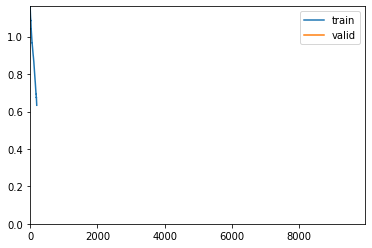

In [ ]:
E.run(
    verbose=True,
)